In [13]:
import ipywidgets as widget
from IPython.display import display
import pandas as pd 
import edhc as erk

In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

<AxesSubplot:>

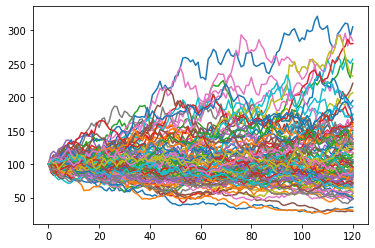

In [16]:
erk.gbm(10, 100, mu=0.01).plot(legend=False)

In [26]:
def show_gbm(n_scenario, mu, sigma):
    s_0 = 100
    prices = erk.gbm(n_scenarios=n_scenario, mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color="indianred", alpha=0.5, linewidth=2, figsize=(12,6))
    ax.axhline(y=s_0, ls=":", color="black")
    ax.set_ylim(top=400)
    ax.plot(0, s_0,marker= "o", color="darkred", alpha= 0.2)

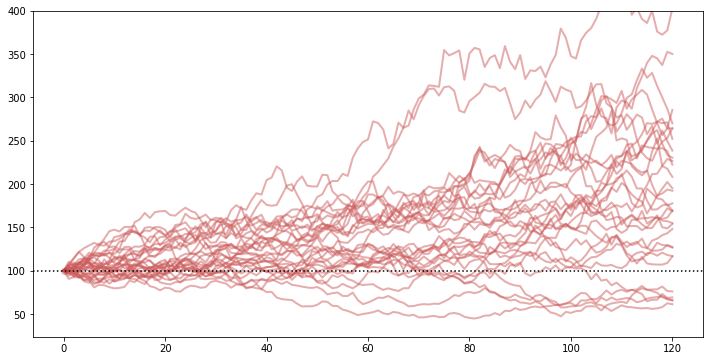

In [27]:
show_gbm(n_scenario=30, mu=.07, sigma=0.15)

In [28]:
gbm_control = widget.interactive(show_gbm,
                                 n_scenario = (1, 20,1),
                                 mu = (-.2, 0.2, 0.1),
                                 sigma = (0, 0.3, 0.1),
                                )
                                 

In [29]:
display(gbm_control)

interactive(children=(IntSlider(value=10, description='n_scenario', max=20, min=1), FloatSlider(value=0.0, des…

## interactive CPPI 

In [41]:
def show_ccpi(n_scenario=30, mu=0.07, sigma=0.15,m=3, floor=0.1, risk_free_rate=.03, y_max=100):
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenario, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=risk_free_rate, m=m, start=start,floor=floor)
    wealth = btr["Wealth"]
    y_max = wealth.values.max() * y_max /100
    ax = wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12,6))
    ax.axhline(y=start, ls=":", color="black")
    ax.axhline(y=start*floor, ls="--", color="red")
    ax.set_ylim(top=y_max)
    

In [45]:
cppi_controls = widget.interactive(show_ccpi,
                                   n_scenario=widget.IntSlider(min=1, max=100, step=5, value=50),
                                   mu= (0., +0.2, 0.01),
                                   sigma= (0, .3, .05),
                                   floor= (0, 2, 0.1),
                                   risk_free_rat= (0,.5, .1),
                                   y_max = widget.IntSlider(min=0, max=100, step=1, value=50,
                                                           description="Zoom Y Axis")
)

In [46]:
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenario', min=1, step=5), FloatSlider(value=0.07, de…